<div style="text-align: center"><img src="https://db.tt/NpW3noem"></div>

# R code with pipes
這場[DSHC meetup](http://www.meetup.com/Data-Science-HC/events/224525514/)的講題是R code with pipes，pipes是一種讓程式可讀性更高的寫作style，這場talk將展示如何透過magrittr套件，進化R語言寫作的習慣。

<div style="text-align: center"><img src="https://upload.wikimedia.org/wikipedia/en/b/b9/MagrittePipe.jpg"></div>
<center>Ceci n’est pas une pipe (French for "This is not a pipe") made by the Belgian surrealist painter René Magritte</center>

# magrittr 簡介
- Simplifying R code with pipes
- 2014年最有影響力的R套件之一
- 展開的程式碼會產生很多暫存變數
- 壓縮的程式碼不好讀
- 套件magrittr部份解決了這個問題
- 基本算子 `%>%`, `%<>%`, `%T>%`, `%$%`

# 1. 基本算子 (`%>%`)
- 想像一下程式的寫作與閱讀邏輯
- `%>%` 會將算子左邊的物件 (object) 傳到右邊的函數 (function) 中第一個argument
- `.` 點號適合用在欲傳入變數不是在傳入函數的第一個位置時使用
- use `x %>% f`, rather than `f(x)`
- or use `x %>% f(y, z)`, rather than `f(x, y, z)`
- or `y %>% f(x, ., z)`, rather than `f(x, y, z)`

## 1.1. 第一個例子

In [1]:
# install.packages("magrittr")
library(magrittr)
x <- 1:10

mean(x)
x %>% mean # 由左而右順序操作

[1] 5.5

[1] 5.5

In [ ]:
# How it work
"%>%" <- function(x,f) do.call(f,list(x)) # see http://stackoverflow.com/a/8897778
pi %>% sin %>% cos  # 1

## 1.2. 幾種等價用法
- 利用三角形面積公式說明`%>%`算子的幾種等價用法

In [2]:
tri_area <- function(a, h=5) a*h/2
a <- 10
tri_area(a)
a %>% tri_area          # 省略括號
a %>% tri_area(h=5)     # 保留括號
a %>% tri_area(., h=5)  # 以 `.` 來表示欲傳入的變數

[1] 25

[1] 25

[1] 25

[1] 25

## 1.3. 複雜一點
感受一下指令壓縮的簡便與痛苦，你知道以下指令的意義嗎？

In [ ]:
a_list <- list(1:4, 3:5, 4:7)
lapply(a_list, function(x) setdiff(sort(unique(unlist(a_list))), x))

把指令分解後，試著解讀看看

In [4]:
a_list <- list(1:4, 3:5, 4:7)
unique_item <- sort(unique(unlist(a_list))) # 1 2 3 4 5 6 7
lapply(a_list, function(x) setdiff(unique_item, x))

[[1]]
[1] 5 6 7

[[2]]
[1] 1 2 6 7

[[3]]
[1] 1 2 3

用 pipe style 後，code是不是比較好"讀"?

In [5]:
a_list %>% unlist %>% unique %>% sort %>% {
   lapply(a_list, setdiff, x = .)
}

[[1]]
[1] 5 6 7

[[2]]
[1] 1 2 6 7

[[3]]
[1] 1 2 3

## 1.4. 創建一元函數

In [6]:
f <- . %>% sum(.) %>% sqrt
# is equivalent to 
f <- function(.) sqrt(sum(.))
f(1:10)

[1] 7.416198

## 1.5. 大括號 `{ }` 與 點號 `.` 的用法
- 括號裡面的只要不是其他 `%>%` 後面的`.` 都代表你前面傳入的值
- `x %>% f(y = nrow(.), z = ncol(.))` is equivalent to `f(x, y = nrow(x), z = ncol(x))`
- `x %>% {f(y = nrow(.), z = ncol(.))}` is equivalent to `f(y = nrow(x), z = ncol(x))`

In [7]:
f <- function(x=NA, y=NA, z=NA) {
  cat("x =", x, "\n")
  cat("y =", y, "\n")
  cat("z =", z, "\n\n")
}

1:10 %>% f(min(.), max(.))   # f(x=1:10, y=min(1:10), y=max(1:10))

1:10 %>% f(y=min(.), z=max(.))   # f(x=1:10, y=min(1:10), y=max(1:10))

1:10 %>% {f(y=min(.), z=max(.))} # f(x=NA, y=min(1:10), z=max(1:10))

x = 1 2 3 4 5 6 7 8 9 10 
y = 1 
z = 10 

x = 1 2 3 4 5 6 7 8 9 10 
y = 1 
z = 10 

x = NA 
y = 1 
z = 10 



## 1.6. 再一個常見的例子

In [ ]:
plot(density(sample(mtcars$mpg, size=10000, replace=TRUE), kernel="gaussian"), col="red", main="density of mpg")

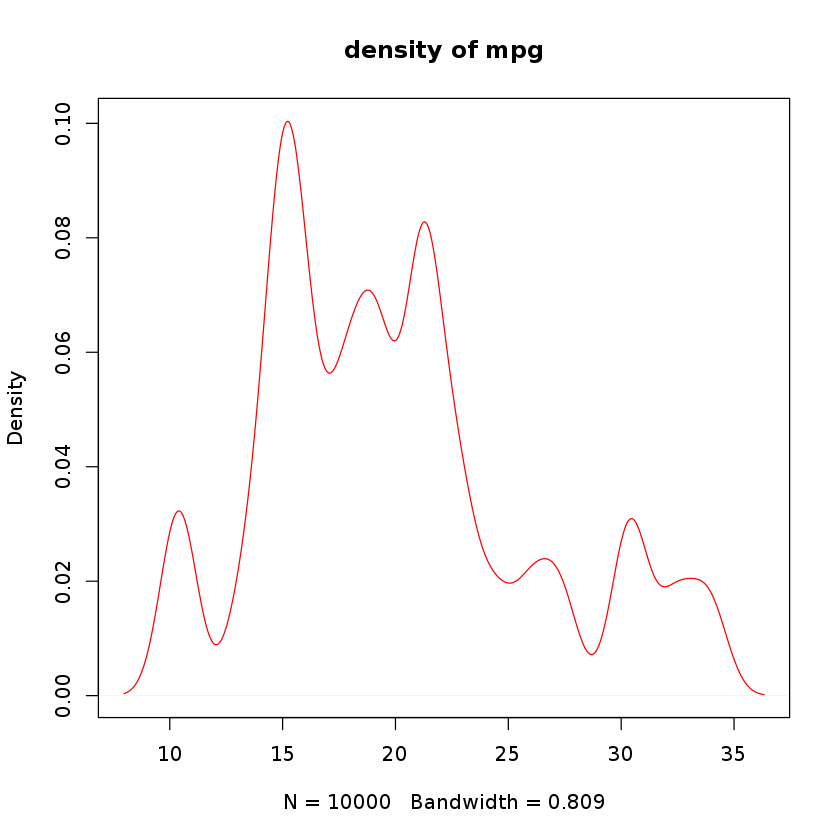

In [8]:
mtcars$mpg %>% 
    sample(size=10000, replace=TRUE) %>% 
    density(kernel="gaussian") %>% 
    plot(col="red", main="density of mpg")

# 2. 其他算子
## 2.1. 具有賦值功能的 `%<>%` 算子
不僅計算新值 (`>`)，同時改變傳入物件的值 (`<`)，但不會輸出(`print`)結果

In [9]:
b <- 9

b %<>% sqrt
b
# 等價於以下兩種寫法
# b %<>% sqrt %>% print 
# b <- b %>% sqrt %>% print

[1] 3

## 2.2. 只傳遞，不回傳值的 %T>% 算子 (tee operations)
- 大多用於不傳回值的函數，譬如：`plot`
- 或是程式寫到一個段落，需要暫時斷開pipe line的時候

height   weight 
 65.0000 136.7333

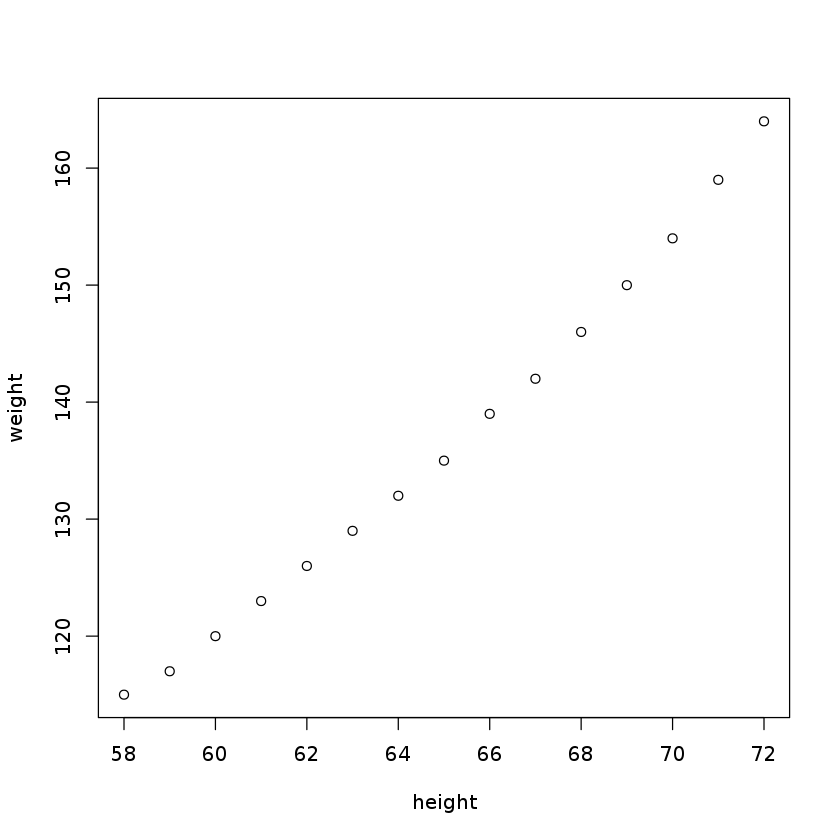

In [10]:
women %T>%
    plot %>% # plot usually does not return anything.
    colMeans

## 2.3. 可以取得變數的 `%$%` 算子 (exposition operations)
- 直接把前面物件的特定變數直接叫出來
- 某些情況下，欲傳遞的函數不需要接受左邊物件傳過來的所有資訊 (只需要其中幾欄)時適用

[1] 0.8179411

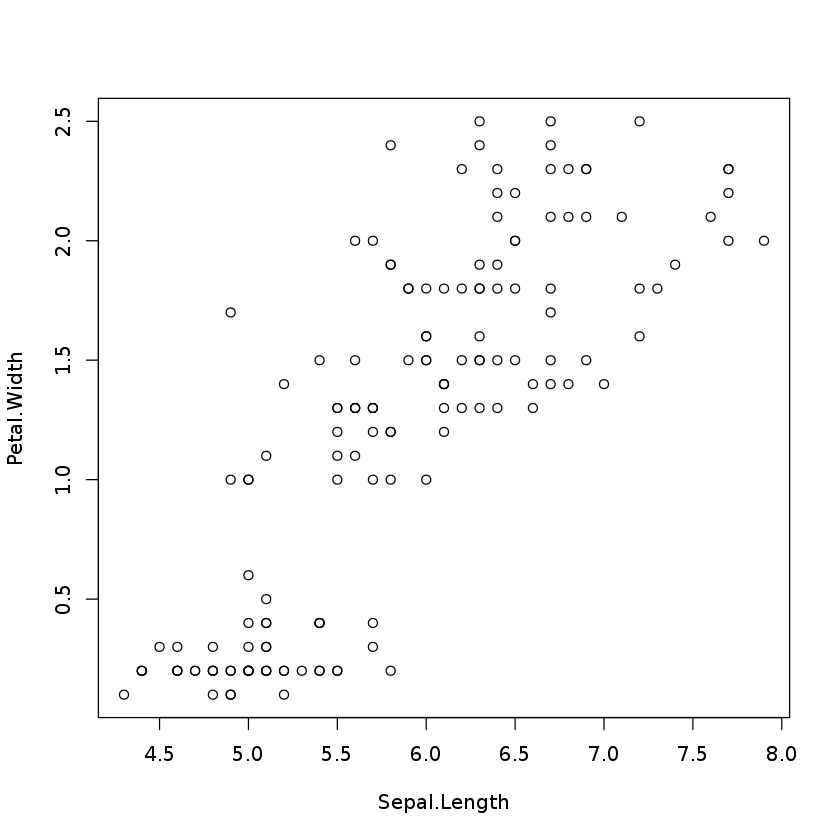

In [11]:
iris %T>% 
    plot(Petal.Width~Sepal.Length, data=.) %$%
    cor(x=Sepal.Length, y=Petal.Width)

- Pipe 算子右邊的計算內容可以被包在大括號 {} 中一起執行

In [12]:
fit <- lm(Petal.Width ~ Sepal.Length, data=iris)
sigma_hat <- fit %$% {crossprod(residuals) / df.residual}
sigma_hat

0.1935963


## 2.4. `->` 算子

In [13]:
which(1:10 > 5) -> id
id

[1]  6  7  8  9 10

In [62]:
iris %>% lm(Petal.Width ~ Sepal.Length, data=.) %$%
    {crossprod(residuals) / df.residual} -> sigma_hat2

## 2.5 別名 (Aliases) 

In [14]:
1:10 %>% add(1) 
# is equivalent to
# 1:10 + 1

1:10 %>% multiply_by(2)
# is equivalent to
# 1:10 * 2

[1]  2  3  4  5  6  7  8  9 10 11

[1]  2  4  6  8 10 12 14 16 18 20

In [15]:
iris %>%
   extract(, 1:4) %>%
   head
# is equivalent to 
# iris[,1:4] %>% head

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


## 目前magrittr (version 1.5.0) 支援的別名有：

<table>
<tr>
<td> extract </td>
<td> `[` </td>
</tr>
<tr>
<td> extract2 </td>
<td> `[[` </td>
</tr>
<tr>
<td> inset </td>
<td> `[<-` </td>
</tr>
<tr>
<td> inset2 </td>
<td> `[[<-` </td>
</tr>
<tr>
<td> use_series </td>
<td> `$` </td>
</tr>
<tr>
<td> add </td>
<td> `+` </td>
</tr>
<tr>
<td> subtract </td>
<td> `-` </td>
</tr>
<tr>
<td> multiply_by </td>
<td> `*` </td>
</tr>
<tr>
<td> raise_to_power </td>
<td> `^` </td>
</tr>
<tr>
<td> multiply_by_matrix </td>
<td> `%*%` </td>
</tr>
<tr>
<td> divide_by </td>
<td> `/` </td>
</tr>
<tr>
<td> divide_by_int </td>
<td> `%/%` </td>
</tr>
<tr>
<td> mod </td>
<td> `%%` </td>
</tr>
<tr>
<td> is_in </td>
<td> `%in%` </td>
</tr>
<tr>
<td> and </td>
<td> `&#038;` </td>
</tr>
<tr>
<td> or </td>
<td> `|` </td>
</tr>
<tr>
<td> equals </td>
<td> `==` </td>
</tr>
<tr>
<td> is_greater_than </td>
<td> `>` </td>
</tr>
<tr>
<td> is_weakly_greater_than </td>
<td> `>=` </td>
</tr>
<tr>
<td> is_less_than </td>
<td> `<` </td>
</tr>
<tr>
<td> is_weakly_less_than </td>
<td> `<=` </td>
</tr>
<tr>
<td> not (`n&#8217;est pas`) </td>
<td> `!` </td>
</tr>
<tr>
<td> set_colnames </td>
<td> `colnames<-` </td>
</tr>
<tr>
<td> set_rownames </td>
<td> `rownames<-` </td>
</tr>
<tr>
<td> set_names </td>
<td> `names<-` </td>
</tr>
</table>

# 3. 雜七雜八
## 3.1. 參考資料
- smbache/magrittr · GitHub (https://github.com/smbache/magrittr)
- magrittr 1.5 | RStudio Blog (http://blog.rstudio.org/2014/12/01/magrittr-1-5/)
- 

## 3.2. 該知道的套件 
- R package `dplyr` for data ETL [ref](https://github.com/hadley/dplyr)
- R package `ggvis` for data Viz [ref](https://github.com/rstudio/ggvis)